 # Intro to Regularized Regressions
 
 Class,
 
 welcome back. We ar heading to somewhat familiar territory today - regressions, but with an ML twist.
 
 First things first, setup.

In [3]:
## setup chunk
import mglearn
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## Unregularized Regressions (OLS)

To understand regularization, let me start with the unregularized Ordinary Least Squares (OLS) model you all know and love.

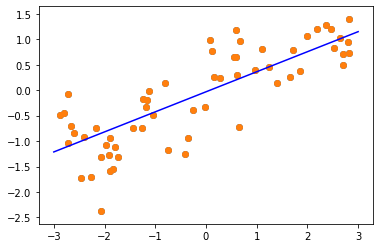

In [4]:
from sklearn.linear_model import LinearRegression

# simulate data
X, y = mglearn.datasets.make_wave(n_samples=60)
plt.scatter(X, y)  # plot n see data pattern

# train-test-split like before
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# instantiate and fit model
lr = LinearRegression().fit(X_train, y_train)

# plot and see how well simple lin model fits data
xpts = np.linspace(-3, 3, 100)
ypts = lr.predict(xpts.reshape(-1, 1))

plt.scatter(X, y)  # plot n see data pattern
plt.plot(xpts, ypts, 'b-')

This simple linear regression or OLS (Ordinary Least Squares) you've seen before, so won't dwell here much.

For completeness sake, quick look at familiar OLS results we expect such as coefficients, Rsquared etc are below.

In [5]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


## Moving to Multivariate Regressions

Let's try a more realistic dataset below, with 105 input features potentially related to a metric outcome.

In [8]:
# load data
X, y = mglearn.datasets.load_extended_boston()
print("Size of X: ", X.shape)

Size of X:  (506, 104)


In [9]:
# instantiate and fit model on split sample
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

# Assess model fit in terms of R squares
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


HUGE difference between raining and test set performance suggestive of lots of Overfitting.

IOW, the model has learned too well on this data and will perform poorly on fresh, never-before-seen test data.

Simpler models with fewer features tend to generalize better to test data. 

In what follows I *force* model simplicity via regularization. Let's head to the slides to see what this is all about.

## Ridge Regressions

In ridge regressions, the coeffs are chosen not only to predict well on training data but also to fit an additional constraint.

Namely that the coeffs be as small as feasible. Intuitively, this means that each feature should have as little effect on Y as possible (i.e. by having a small slope). 

Behold a demo.

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Note above that the training score is lower than in OLs but the test score is higher. We care more about the test sample scores.

Ridge regression penalizes model complexity (in terms of feature weights) and thus forces simplicity. Simple models tend to generalize better to test samples.

The *alpha* parameter determines how much the coeffs will be shrunk. Higher the alpha, more the model forces the coeffs to zero. 

Below, I test two far-apart alpha values - 0.1 and 10 and then oserve their effect on test sample performance.

In [12]:
# train ridge model with alpha=10, heavy restriction on coeffs
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("Training set score for alpha=10: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score for alpha=10: {:.2f}".format(ridge10.score(X_test, y_test)))
print("\n")

# train ridge model with alpha=0.1, almost no restriction on coeffs
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("Training set score for alpha=0.1: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score for alpha=0.1: {:.2f}".format(ridge01.score(X_test, y_test)))


Training set score for alpha=10: 0.79
Test set score for alpha=10: 0.64


Training set score for alpha=0.1: 0.93
Test set score for alpha=0.1: 0.77


Seems like alpha=0.1 outperforms alpha-10 in test sample scores.

What are the odds that *all* the 104 features in the dataset affect Y significantly? If they all don't, which ones don't? 

Ridge regressions force the irrelevant feature coeffs towards zero and help simplify the model.

Again, to better see the intuition, let's plot this and see what it means to vary alpha the way we did.

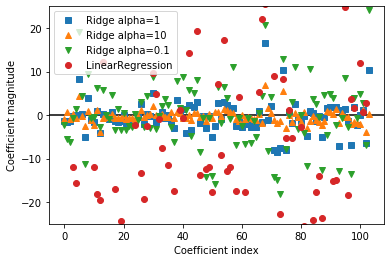

In [13]:
# plot coeffs from ridge regn and OLS
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")  # this is the default
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

The x-axis shows the magnitude of the 104 coeffs. Closer a coeff is to zero, more insignificant it is.

What do we see? The orange triangles (for alpha=10) have been shrunk closest to the zero line. Unsurprising.

The next one is alpha=1, followed by alpha=0.1 and finally the unregularized OLS.

Another way to understand infuence of regularization is to fix alpha but vary training dataset size. 

P.S. More generally, plots that show model performance as a function of dataset size or composition are called *learning curves*.

Behold a demo chart from an inbuilt mglearn routine.

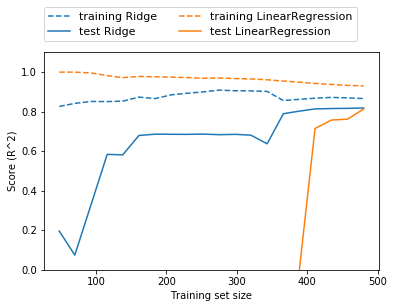

In [14]:
# learning curves for ridge regns
mglearn.plots.plot_ridge_n_samples()

Things to note above.

1. Training score is higher than test score throughout. Expectedly.

2. Because ridge is constrained, its training score tends to be lower than OLS across the board. However, test score for ridge is better than OLS hugely.

3. Ridge outperforms in test samples of small size. OLS, OTOH learns nothing for datasets with < 400 observations.

4. Bottomline; With enough training data, regularization becomes less important and OLS converges to the same performance.

## Lasso Regression

Time now to head to the second regularization form we'll see - lasso.

Whereas Ridge was L2 in that it minimizes the square of a coeff's magnitude', lasso is L1 in that it minimzes the absolute value of a coeff. 

The consequence is that in lasso, some coeffs are *exactly* zero.

Implication is that lasso can be used as a form of *automated feature selection* and point to us the most important features in a large dataset.

In [15]:
from sklearn.linear_model import Lasso

# instantiate and fit model
lasso = Lasso().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Lasso seems to do badly btoh in training and in test. It used only 4 of 105 features. Suggestive of underfitting massively.

So let's reduce the alpha parm and see how things change. IOW, we are relaxing lasso assumptions in the hope that perf improves.

In [16]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


Aha! A lower alpha allowed model perf to jump. 

Lasso is now doing better than ridge even. And all that while using only 33 of the 105 features available!

However, setting alpha too low may negate regulaization effects and move things towards OLS. See below.

In [17]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


How about doing a plot like we did for ridge to see what happens to coeff magnitude?

Behold.

Text(0, 0.5, 'Coefficient magnitude')

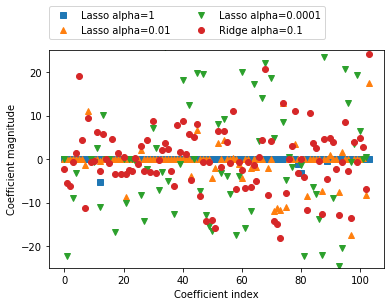

In [18]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Sklearn provides for more regularization methods such as *elasticNet* but will stop here.

back to the slides.

Voleti.